### Librerias a utilizar

In [19]:
import os
import requests
import zipfile
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Descarte de información previa
* Se elimninan archivos de una ejecución pasada para tener un flujo de actualización constantes

In [5]:
# Ruta de las carpetas
data_folder = "../data"
input_folder = "../input"

# Eliminar archivos de la carpeta data
for file_name in os.listdir(data_folder):
    file_path = os.path.join(data_folder, file_name)
    os.remove(file_path)

# Eliminar archivos de la carpeta input
for file_name in os.listdir(input_folder):
    file_path = os.path.join(input_folder, file_name)
    os.remove(file_path)


### Descarga de Archivo ZIP
* El archivo llamado **padron_reducido_ruc.zip** contiene información actualizada de los contribuyentes registrados a la fecha en Sunat.
* Este documento se actualiza cada 24 horas en su pagina **https://www.sunat.gob.pe/descargaPRR/mrc137_padron_reducido.html**

In [6]:
# Define the URL and file paths
url = "http://www2.sunat.gob.pe/padron_reducido_ruc.zip"
download_path = "../input/padron_reducido_ruc.zip"
extract_path = "../data/"

# Download the file
response = requests.get(url, stream=True)
response.raise_for_status()

with open(download_path, "wb") as file:
    for chunk in response.iter_content(chunk_size=8192):
        file.write(chunk)

# Extract the file
with zipfile.ZipFile(download_path, "r") as zip_ref:
    zip_ref.extractall(extract_path)

# Remove the downloaded zip file
# os.remove(download_path)


### Lectura de información

In [7]:
file_path = "../data/padron_reducido_ruc.txt"  # Replace with the actual file path
file_size = os.path.getsize(file_path)
file_size_gb = file_size / 1073741824

file_path = "../data/padron_reducido_ruc.txt"  # Ruta del archivo de datos

# Leer el archivo en un DataFrame de pandas
df = pd.read_csv(file_path, delimiter="|", encoding='latin1', on_bad_lines='skip')

## El archivo pesa 1.31 GB
print(f"\nEl tamaño del archivo es {round(file_size_gb,2)} GB.")

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_26192\289055772.py:8: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, delimiter="|", encoding='latin1', on_bad_lines='skip')



El tamaño del archivo es 1.31 GB.


In [8]:
headers = df.columns
print(headers)


Index(['RUC', 'NOMBRE O RAZÓN SOCIAL', 'ESTADO DEL CONTRIBUYENTE',
       'CONDICIÓN DE DOMICILIO', 'UBIGEO', 'TIPO DE VÍA', 'NOMBRE DE VÍA',
       'CÓDIGO DE ZONA', 'TIPO DE ZONA', 'NÚMERO', 'INTERIOR', 'LOTE',
       'DEPARTAMENTO', 'MANZANA', 'KILÓMETRO', 'Unnamed: 15'],
      dtype='object')


In [9]:
df

,RUC,NOMBRE O RAZÓN SOCIAL,ESTADO DEL CONTRIBUYENTE,CONDICIÓN DE DOMICILIO,UBIGEO,TIPO DE VÍA,NOMBRE DE VÍA,CÓDIGO DE ZONA,TIPO DE ZONA,NÚMERO,INTERIOR,LOTE,DEPARTAMENTO,MANZANA,KILÓMETRO,Unnamed: 15
0,10452159428,GARCIA CHANCO CARLOS AUGUSTO,ACTIVO,HABIDO,-,-,-,-,-,-,-,-,-,-,-,NaN
1,10806173695,TOQUE GOMEZ ALEJANDRO,ACTIVO,HABIDO,-,-,-,-,-,-,-,-,-,-,-,NaN
2,10758072075,RAMIREZ VALVERDE DAVID ELIAS,ACTIVO,HABIDO,-,-,-,-,-,-,-,-,-,-,-,NaN
3,10100214283,FERNANDEZ OSORIO CARLA GUADALUPE,ACTIVO,HABIDO,-,-,-,-,-,-,-,-,-,-,-,NaN
4,10463572734,DAZA ROSALES GILDER,ACTIVO,HABIDO,-,-,-,-,-,-,-,-,-,-,-,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16470802,20612548189,GRUPO NATIVA TEXTIL EIRL,INHABILITADO-VENT.UN,-,-,-,-,-,-,-,-,-,-,-,-,NaN
16470803,20612548197,KAMAQ SERVICE S.A.C.,INHABILITADO-VENT.UN,-,-,-,-,-,-,-,-,-,-,-,-,NaN
16470804,10749251650,ROMERO LAZO CRISTHIAN MICHAEL,NUM. INTERNO IDENTIF,NO APLICABLE,150133,----,MZ C LT 6 A.H. DEFENSORES,----,-,-,-,-,-,-,-,NaN
16470805,10748913047,FORTUNIC VARGAS FRANCESCO NICOLA,NUM. INTERNO IDENTIF,NO APLICABLE,150140,CAL.,PUERTO PIZARRO MZ.M LT.10,----,-,-,202,-,-,-,-,NaN


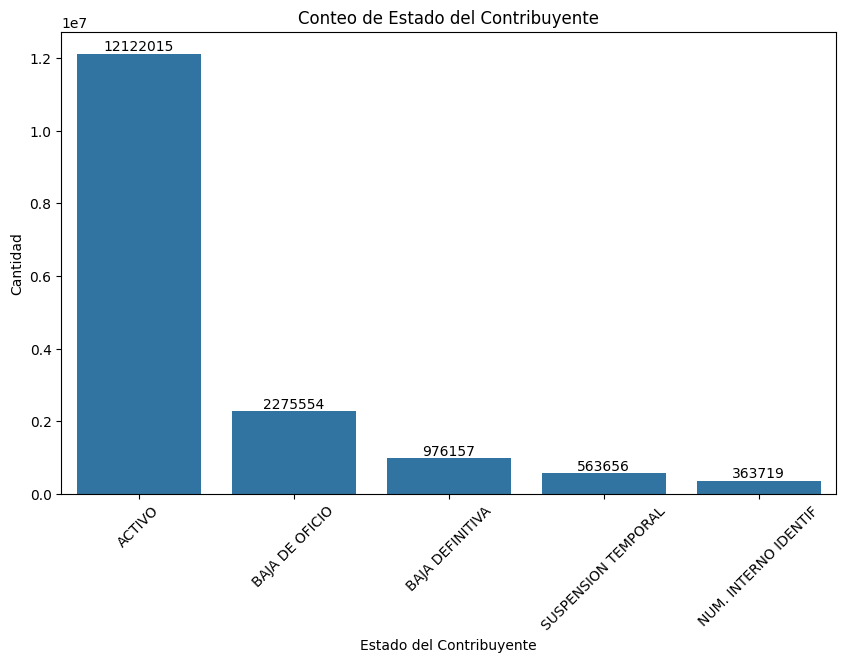

In [21]:
# Get counts of each state of the taxpayer
estado_contribuyente_counts = df['ESTADO DEL CONTRIBUYENTE'].value_counts().reset_index()
estado_contribuyente_counts.columns = ['Estado', 'Count']
estado_contribuyente_counts = estado_contribuyente_counts.head(5)  # Select the first 5 rows

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Estado', y='Count', data=estado_contribuyente_counts)
plt.xlabel('Estado del Contribuyente')
plt.ylabel('Cantidad')
plt.title('Conteo de Estado del Contribuyente')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Add labels to the bars
for i, count in enumerate(estado_contribuyente_counts['Count']):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()


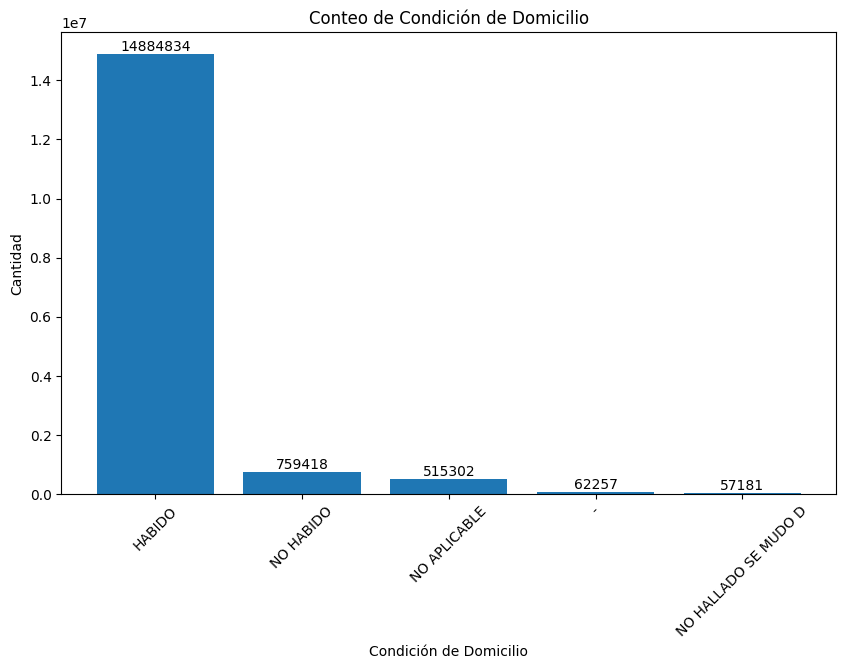

In [15]:
import matplotlib.pyplot as plt

condicion_domicilio_counts = df['CONDICIÓN DE DOMICILIO'].value_counts().reset_index()
condicion_domicilio_counts.columns = ['Condición de Domicilio', 'Count']
condicion_domicilio_counts = condicion_domicilio_counts.head(5)  # Select the first 5 rows

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(condicion_domicilio_counts['Condición de Domicilio'], condicion_domicilio_counts['Count'])
plt.xlabel('Condición de Domicilio')
plt.ylabel('Cantidad')
plt.title('Conteo de Condición de Domicilio')
plt.xticks(rotation=45)

# Add labels to the bars
for i, count in enumerate(condicion_domicilio_counts['Count']):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()
